# **Assignment #05**

# **Hope to Skills**

# **Question 1:** Use the House Prices dataset from Kaggle to build a linear regression model to
predict house prices.

# **import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Load dataset**

In [ ]:
data =pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# **Data Pre-processs**

In [ ]:
data.shape

(4600, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# **Check Mssing Value**

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

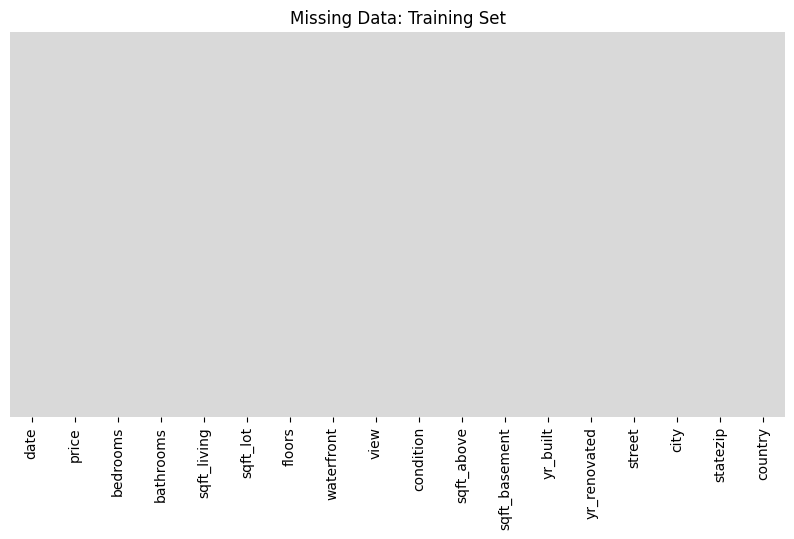

In [ ]:
# Heatmap
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# **Drop the columns**

In [ ]:
data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [ ]:
data.drop('street' ,axis=1, inplace=True)

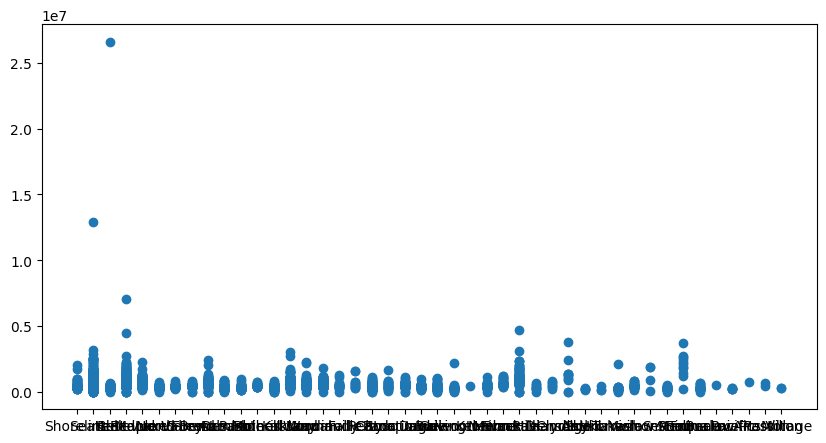

In [ ]:
plt.scatter(data["city"],data["price"])

# **Calculate the average price of houses**

In [ ]:
average_price = data['price'].mean()
f"The average price is: {average_price:.2f}"

'The average price is: 551962.99'

# **Display column names of the DataFrame**

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip',
       'country'],
      dtype='object')

# **Count the number of houses in each city**

In [ ]:
houses_per_city = data.groupby('city').size().reset_index(name='number of house')
# Group by city and count the number of houses in each city
print(houses_per_city)

                   city  number of house
0                Algona                5
1                Auburn              176
2    Beaux Arts Village                1
3              Bellevue              286
4         Black Diamond                9
5               Bothell               33
6                Burien               74
7             Carnation               22
8            Clyde Hill               11
9             Covington               43
10           Des Moines               58
11               Duvall               42
12             Enumclaw               28
13            Fall City               11
14          Federal Way              148
15  Inglewood-Finn Hill                1
16             Issaquah              187
17              Kenmore               66
18                 Kent              185
19             Kirkland              187
20     Lake Forest Park               36
21         Maple Valley               96
22               Medina               11
23        Mercer

# **Count the number of houses in each city, sort the cities by the number of houses**

In [ ]:
#house in each city
houses_per_city =data.groupby('city').size().reset_index(name='number_of_houses')

#sort the dataframe by the number of house in descending order
houses_per_city_sorted = houses_per_city.sort_values(by='number_of_houses', ascending =False)

print(houses_per_city_sorted)



                   city  number_of_houses
35              Seattle              1573
32               Renton               293
3              Bellevue               286
31              Redmond               235
19             Kirkland               187
16             Issaquah               187
18                 Kent               185
1                Auburn               176
33            Sammamish               175
14          Federal Way               148
36            Shoreline               123
42          Woodinville               115
21         Maple Valley                96
23        Mercer Island                86
6                Burien                74
38           Snoqualmie                71
17              Kenmore                66
10           Des Moines                58
27           North Bend                50
9             Covington                43
11               Duvall                42
20     Lake Forest Park                36
25            Newcastle           

# **Calculate the average house price in each city, convert the average prices to integers, sort the cities by the average house price**

In [ ]:
#Average house price in each city
average_price_per_city = data.groupby('city')['price'].mean().reset_index(name='average_price')

#Sort the dataframe by the average house price in descending order
average_price_per_city_sorted = average_price_per_city.sort_values(by='average_price', ascending=False)

print(average_price_per_city_sorted)

                   city  average_price
22               Medina   2.046559e+06
8            Clyde Hill   1.321945e+06
43         Yarrow Point   1.194838e+06
23        Mercer Island   1.123818e+06
3              Bellevue   8.471807e+05
2    Beaux Arts Village   7.450000e+05
13            Fall City   6.926818e+05
33            Sammamish   6.869176e+05
31              Redmond   6.676495e+05
25            Newcastle   6.660467e+05
19             Kirkland   6.515836e+05
42          Woodinville   6.095650e+05
16             Issaquah   5.961637e+05
35              Seattle   5.798375e+05
29              Preston   5.624500e+05
38           Snoqualmie   5.363053e+05
39      Snoqualmie Pass   5.250000e+05
30           Ravensdale   5.140714e+05
7             Carnation   5.087520e+05
26        Normandy Park   5.067931e+05
5               Bothell   4.814419e+05
41               Vashon   4.725569e+05
20     Lake Forest Park   4.484750e+05
17              Kenmore   4.474940e+05
18                 Kent  

# **Heatmap showing the correlations between numerical columns in the DataFrame**

<Axes: >

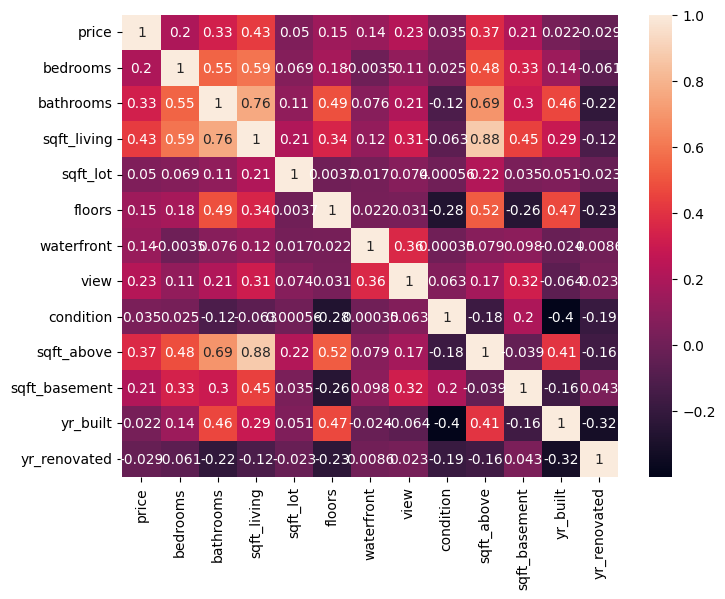

In [ ]:
# heatmap the correlation between numerical columns in the Dataframe

x= data.select_dtypes('number')
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(),annot=True)

# **Check boxplot**

In [ ]:
data[data["price"]!=0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


2400000.0
995% percentile:  4579


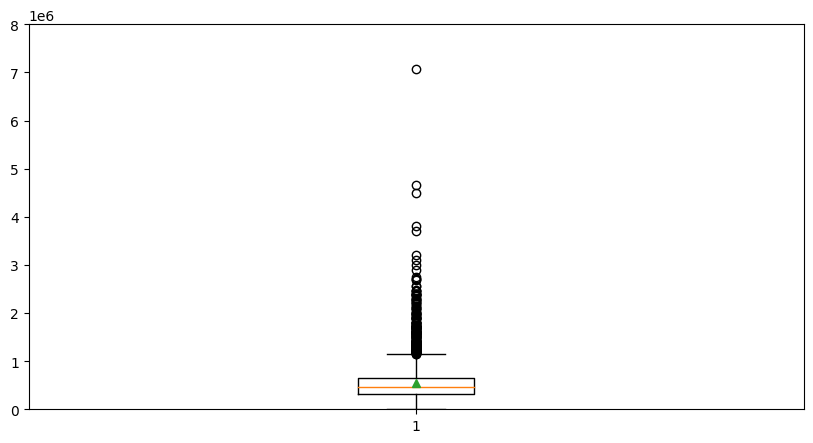

In [ ]:
plt.boxplot(data["price"],showmeans=True)
plt.ylim(0, 8e6)
quantile995 = data["price"].quantile(0.995)
print(quantile995)
num_values_in_995th_percentile = np.sum(data["price"] <= quantile995)
print("995% percentile: ", num_values_in_995th_percentile)

In [ ]:
df2 = data.copy()
df2 = df2[df2["price"] <= quantile995]
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
print(df2.shape)

(4579, 13)


In [ ]:
data.shape

(4600, 17)

In [ ]:
data. drop(columns=['city', 'statezip','date', 'country','street'], axis=1,inplace=True)

# **Split data**

In [ ]:
y = df2["price"]
x = df2.drop("price", axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) # Split the data into training and testing sets.

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [ ]:
# x Represents the Features
x_transform.shape
x_transform

array([[-0.43755958, -0.84604498, -0.84731724, ..., -0.67807851,
        -0.53050568,  1.22086948],
       [ 1.77024795,  0.45037934,  1.6499416 , ..., -0.06032199,
        -1.67411082, -0.8262596 ],
       [-0.43755958, -0.19783282, -0.20948923, ..., -0.67807851,
        -0.16051578, -0.8262596 ],
       ...,
       [-0.43755958,  0.45037934,  0.95806036, ..., -0.67807851,
         1.28580837, -0.8262596 ],
       [ 0.66634418, -0.19783282, -0.03651892, ...,  1.57232024,
         0.10856778, -0.8262596 ],
       [-0.43755958,  0.45037934, -0.68515758, ..., -0.67807851,
         0.64673491, -0.8262596 ]])

In [ ]:
y # y represents the Target
y.shape

(4579,)

# **LINEAR REGRESSION**

# **Model Training**

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(X_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train)

LinearRegression()

# **Class prediction**

In [ ]:
# Predict
y_pred = lin_reg.predict(X_test)
print(y_pred.shape)
print(y_pred)

(916,)
[ 635121.35715898  553385.70173765  521366.9555146   436423.33030027
  393823.9892229  1156536.34471701 1158453.5183356   365581.84413752
  396636.53433926  359935.18979417  616018.45348577  495165.19987991
  361516.5892689   567214.81133536  664234.35941863  648282.91470298
  573266.00958419  670638.90055894  684082.15512944  271744.80350791
  572701.46523545  488593.8308071   315549.48423392  251457.26354443
  496106.40070505  270201.46947579  497676.11718021  577115.73505082
  831621.15691949  814121.12721007  451677.68415656  453858.01138436
  721507.94074579  264238.56326045  832891.11325312  489840.60521079
  442498.56261454  526367.50115956  503830.70557146  687801.94793831
  374218.01193357  542778.31423487  466913.34276922  244718.60167959
  325871.34519781  311092.24484276  516067.40111257  746002.8869716
  532217.66666365  585072.49046016  302005.48074718  349439.12492097
  250903.7208541   265694.17752877  511852.17011535  585458.633061
  433365.78757718  630736.3197

# **Draw the Graphy**

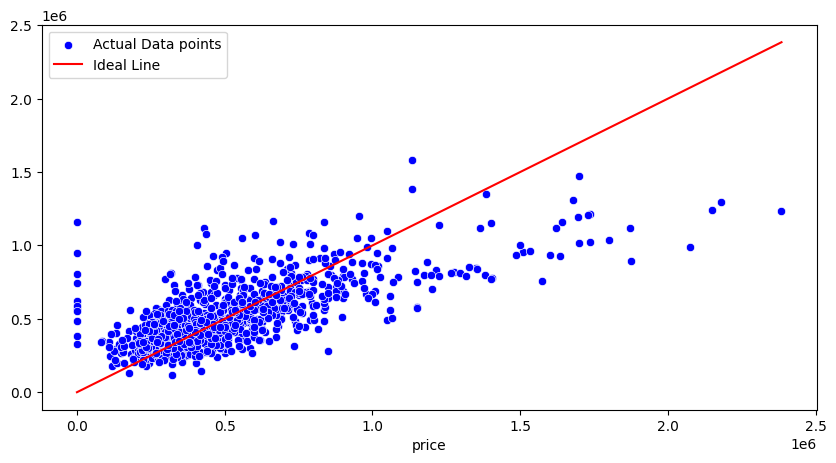

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
     499990.00 |     635121.36
     695000.00 |     553385.70
     316500.00 |     521366.96
     549000.00 |     436423.33
     355000.00 |     393823.99
    1640000.00 |    1156536.34
          0.00 |    1158453.52
     510250.00 |     365581.84
     479900.00 |     396636.53
     310000.00 |     359935.19
     700000.00 |     616018.45
     300000.00 |     495165.20
     344000.00 |     361516.59
     275000.00 |     567214.81
     551000.00 |     664234.36
     675000.00 |     648282.91
     339990.00 |     573266.01
     450000.00 |     670638.90
     425000.00 |     684082.16
     195000.00 |     271744.80
     550000.00 |     572701.47
     370000.00 |     488593.83
     254000.00 |     315549.48
     330000.00 |     251457.26
     442500.00 |     496106.40
     499950.00 |     270201.47
     609000.00 |     497676.12
     340000.00 |     577115.74
     578000.00 |     831621.16
     725000.00 |     814121.13
     

# **Model Evaluation**

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 49716403428.92109
Root Mean Squared Error: 222971.7547783151


# **Question 2:** Use the Iris dataset from Kaggle to build a K-Nearest Neighbors (KNN) classifier
to classify iris species.

# **Load the Dataset**

In [ ]:
import pandas as pd

In [ ]:
iri= pd.read_csv('/content/Iris.csv')

In [ ]:
iri.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Preprocess the dataset**

In [ ]:
iri.shape

(150, 6)

In [ ]:
iri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iri.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iri.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

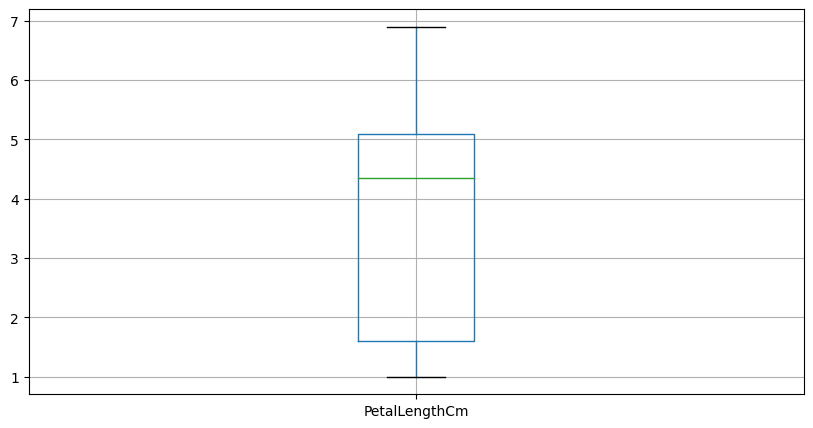

In [ ]:
iri.boxplot(['PetalLengthCm'])

<Axes: >

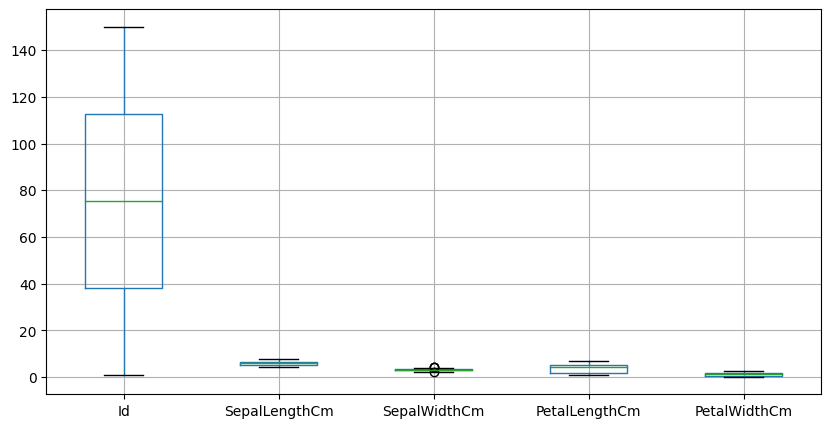

In [ ]:

iri.boxplot()

<Axes: >

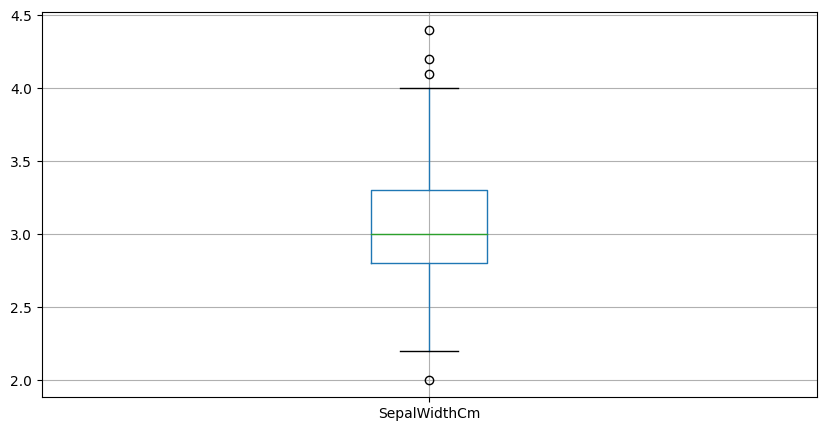

In [ ]:
iri.boxplot(['SepalWidthCm'])

# **Display the Plot**

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

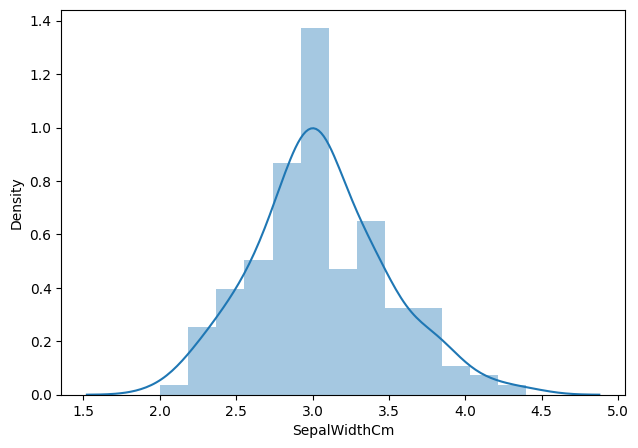

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(iri['SepalWidthCm'])



In [ ]:

print('Mean value of Cgpa',iri['SepalWidthCm'].mean())
print('Std value of cgpa', iri['SepalWidthCm'].std())
print('Min value of cgpa', iri['SepalWidthCm'].min())
print('Max value of cgpa', iri['SepalWidthCm'].max())

Mean value of Cgpa 3.0540000000000003
Std value of cgpa 0.4335943113621737
Min value of cgpa 2.0
Max value of cgpa 4.4


# **Find the boundaries of values**

In [ ]:

print('Hightest allowed ', iri['SepalWidthCm'].mean()  + 3*iri['SepalWidthCm'].std())
print('Lowest allowed ', iri['SepalWidthCm'].mean() - 3*iri['SepalWidthCm'].std())

Hightest allowed  4.354782934086521
Lowest allowed  1.7532170659134791


# **Find the Outliers**

In [ ]:
iri[(iri['SepalWidthCm'] > 3.70) | (iri['SepalWidthCm'] <2.20)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa


In [ ]:
new_df = iri[(iri['SepalWidthCm'] < 3.70) & (iri['SepalWidthCm'] >2.20)]
new_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
new_df.shape

(131, 6)

<Axes: >

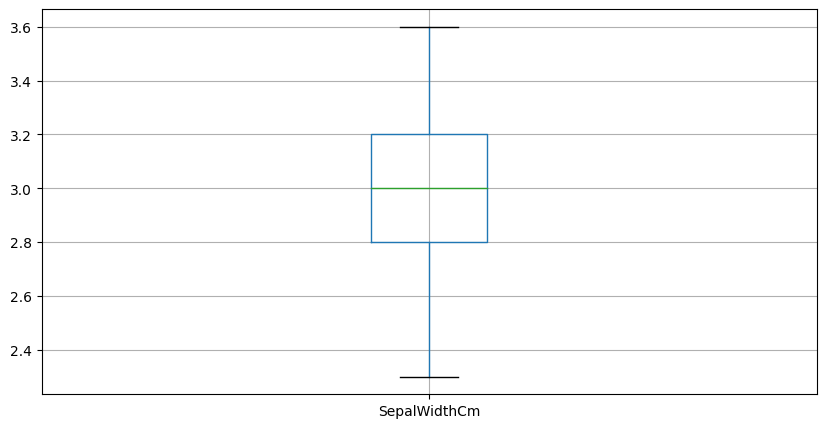

In [ ]:
new_df.boxplot(['SepalWidthCm'])

# **Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

# **Build and train the KNN classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifer = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2 )
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred= classifer.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

# **Accuracy Score**

In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [ ]:
accuracy_score(y_test,y_pred)

1.0

# **Question 3:** Use the Diabetes dataset from Kaggle to build a decision tree regressor to
predict diabetes progression. Train the model and evaluate its performance using Mean
Squared Error (MSE).  
● Load the dataset
● Preprocess the dataset
● Build and train Decision Tree Regressor
● Evaluate its performance using Mean Square Error (MSE)

# **Load The Data**

In [ ]:
dia = pd.read_csv('/content/diabetes (1).csv')

In [ ]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dia.shape

(768, 9)

# **Data Pre-processor**

In [ ]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dia.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Separate features and target

In [ ]:
X= dia.drop('DiabetesPedigreeFunction', axis=1)
y= dia['DiabetesPedigreeFunction']

# **Split the dataset**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Build and train the Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

# Train the regressor
dtr.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

# **Evaluate its performance using Mean Squared Error (MSE)**

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = dtr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.15


# **Question 4:** Use the Titanic dataset from Kaggle to build a logistic regression model to
predict whether a passenger survived or not. Train the model and evaluate its performance
using accuracy and confusion matrix.

● Load the dataset

● Preprocess the dataset

● Build and train Logistic Regression Model

● Evaluate its performance using Accuracy and Confusion Matrix

# **Load the Dataset**

In [8]:
tit =pd.read_csv('/content/gender_submission.csv')

In [9]:
tit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **Preprocess the Dataset**

In [10]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [11]:
tit.shape

(418, 2)

In [37]:
tit.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [12]:
tit.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


# **Build and Train Logistic Regression Model**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [21]:
# Split the data into features and target variable
X = tit.drop('Survived', axis=1)
y = tit['Survived']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

# **Evaluate the Model Performance**

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.5952380952380952
Confusion Matrix:
[[50  0]
 [34  0]]


# **Question 5:** Use "Heart Disease Dataset | Cleaned" dataset to build a classification model to
predict heart disease.

# **Load the Dataset**

In [72]:
dis =pd.read_csv('/content/heart_disease_cleaned.csv')

In [73]:
dis.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [74]:
dis.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **Data Preprocessor**

In [75]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    bool   
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    bool   
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.4+ KB


In [76]:
dis.shape

(919, 16)

In [77]:
dis.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [47]:
dis.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.704853,200.791393,136.815734,0.973408,0.501632,0.993471
std,265.693391,9.429689,18.070335,109.213597,25.371260,1.120490,0.786423,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,224.000000,138.000000,0.800000,0.000000,1.000000
75%,689.500000,60.000000,141.210000,268.000000,156.000000,1.900000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [48]:
dis.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [109]:
dis['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

In [110]:
# Separate target variable from the dataset

X = dis.drop('num', axis=1)
y = dis['num']

# **Split the Data**

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **OneHotEncoder**

In [114]:


from sklearn.preprocessing import OneHotEncoder

In [115]:
pd.get_dummies(dis,columns=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'slope','thal'])

,id,age,trestbps,chol,thalch,exang,oldpeak,ca,num,sex_Female,...,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,63,145.00,233.0,150.00,False,2.300,0.0,0,False,...,True,True,False,False,True,False,False,True,False,False
1,2,67,160.00,286.0,108.00,True,1.500,3.0,2,False,...,False,True,False,False,False,True,False,False,True,False
2,3,67,120.00,229.0,129.00,True,2.600,2.0,1,False,...,False,True,False,False,False,True,False,False,False,True
3,4,37,130.00,250.0,187.00,False,3.500,0.0,0,False,...,False,False,True,False,True,False,False,False,True,False
4,5,41,130.00,204.0,172.00,False,1.400,0.0,0,True,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,127.00,333.0,154.00,False,0.000,0.0,1,True,...,True,False,False,True,False,True,False,False,True,False
915,917,62,143.06,139.0,119.94,True,2.042,0.0,0,False,...,False,False,False,True,False,True,False,False,False,True
916,918,55,122.00,223.0,100.00,False,0.000,1.0,2,False,...,True,False,False,True,False,True,False,True,False,False
917,919,58,150.81,385.0,110.63,True,2.181,0.0,0,False,...,True,True,False,False,False,True,False,False,False,True


In [116]:

pd.get_dummies(dis,columns=['sex', 'dataset', 'cp', 'fbs', 'restecg', 'slope','thal'] ,drop_first=True)

,id,age,trestbps,chol,thalch,exang,oldpeak,ca,num,sex_Male,...,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.00,233.0,150.00,False,2.300,0.0,0,True,...,False,False,True,True,False,False,False,False,False,False
1,2,67,160.00,286.0,108.00,True,1.500,3.0,2,True,...,False,False,False,False,False,False,True,False,True,False
2,3,67,120.00,229.0,129.00,True,2.600,2.0,1,True,...,False,False,False,False,False,False,True,False,False,True
3,4,37,130.00,250.0,187.00,False,3.500,0.0,0,True,...,False,True,False,False,True,False,False,False,True,False
4,5,41,130.00,204.0,172.00,False,1.400,0.0,0,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,916,54,127.00,333.0,154.00,False,0.000,0.0,1,False,...,False,False,False,True,False,True,True,False,True,False
915,917,62,143.06,139.0,119.94,True,2.042,0.0,0,True,...,False,False,True,False,False,True,True,False,False,True
916,918,55,122.00,223.0,100.00,False,0.000,1.0,2,True,...,False,False,False,True,False,True,True,False,False,False
917,919,58,150.81,385.0,110.63,True,2.181,0.0,0,True,...,False,False,False,True,False,False,True,False,False,True


In [117]:


ohe= OneHotEncoder(drop= "first", sparse=False, dtype=np.int32)


In [118]:


X_train_new =  ohe.fit_transform(X_train[['sex', 'dataset', 'cp', 'fbs', 'restecg', 'slope']])

In [119]:
X_test_new = ohe.transform(X_test[['sex', 'dataset', 'cp', 'fbs', 'restecg', 'slope']])

In [120]:
X_train_new.shape

(735, 12)

In [121]:
X_test_new.shape

(184, 12)

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test_new)

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# **LogisticRegression**

In [133]:
model = LogisticRegression(random_state=42)
model.fit(X_train_new, y_train)


LogisticRegression(random_state=42)

# **DecisionTree**

In [134]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_new, y_train)

DecisionTreeClassifier(random_state=42)

# **Random Forest Tree**


In [135]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_new, y_train)

RandomForestClassifier(random_state=42)

# **Gradient Boosting Classifier**

In [136]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_new, y_train)

GradientBoostingClassifier(random_state=42)

# **SVC Model**

In [138]:
model =SVC(random_state=42)
model.fit(X_train_new, y_train)

SVC(random_state=42)

# **Accuracy Score**

In [139]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.84      0.70        75
           1       0.47      0.49      0.48        59
           2       0.00      0.00      0.00        23
           3       0.42      0.22      0.29        23
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.30      0.31      0.29       184
weighted avg       0.45      0.53      0.48       184



In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_new)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.5271739130434783
Confusion Matrix:
[[61 14  0  0  0]
 [23 36  0  0  0]
 [ 7 16  0  0  0]
 [ 9 14  0  0  0]
 [ 0  4  0  0  0]]
